# Exploring the mortality patterns of US slaves 1850-1860

## Brief history of slavery in the US

Between 1607 and 1865 slavery existed in the United States and in the British territory that would become the US. All British colonies in North America had slaves. At the time of the American Revolution, slavery was legal and existed in <b>all thirteen</b> colonies.  Among the signers of the Declaration of Independence a large fraction were slave holders -- including the guy who found it "self evident" that "all men are created equal"...

At the time of the first census, in 1790 there were 697,624 slaves <sup id="a1">[1](#f1)</sup>  
out of a total population of 3,929,214 
aproximagely or approximately 79%<sup id="a2">[2](#f2)</sup>.

But though slavery was tollerated everywhere, it was not necessarily liked. The most important social, economic and political factor that distinguished the North from the South until the Civil the War, was the degree of dependence on slavery. I would argue that the second most important factor distinguishing the regions was that the vast preponderance of immigrants chose to live in the North -- and this too is largely the result of slavery.

Although slavery in the US is hardly <b>un</b>studied, one of the significant limitations in this field is the lack of sources written by slaves about slave life.  This is a fundamental problem in History: As History is written by the powerful--the lives of the powerless (i.e. <i>regular</i> people) are far more obscure. This is not a good thing. If history only chronicles the lives of the 1 percent, its use to us as a guide to making decisions is much reduced. 

The only person more powerless than a slave is an illiterate New World<sup id="a3">[3](#f3)</sup> slave<sup id="a4">[4](#f4)</sup> . 

It is quite exhillerating that a hundred and sixty years later, from the comfort of our laptop computers, we can discover features of the daily experience of slaves that could not have been understood even by the slaves themselves. The awesome power of datascience and demography.
 
## In this week's exercise...
We will develop a dataset showing the mortality pattern of slaves in the US. In the following weeks we will use that data to explore several additional characteristics of the life course of slaves including fertility and migration.  

The challenge this week is to work with a data set that is not quite perfect and is not intended for the use that we are about to put it to.  We'll need to get some facility with the various datascience.Table methods especially
.where(), .select() .apply(), and .append_column() as well as some string functions such as .replace(). With luck
most should be familiar by now.

Hopefuly as we wrestle with these data, we will also have a chance to discuss the American experience with slavery.

<b id="f1">1</b> https://www2.census.gov/prod2/decennial/documents/00165897ch14.pdf [↩](#a1)
<br>
<b id="f2">2</b> Be careful of any arithmetic I do for you [↩](#a2)
<br>

<b id="f4">4</b>See David Brion Davis, <i>Inhuman Bondage: The Rise and Fall of Slavery in the New World</i> for a discussion of the variety of ways that slavery was practiced in human history and the particularly pernicious quality of its New World variety.[↩](#a4)
<br>
<b id="f4">4</b>http://www.pbs.org/wnet/slavery/experience/education/docs1.html [↩](#a4)



In [17]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
#from datascience.predicates import are
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from datascience.predicates import are

## Let's begin by reading in some data 

These are from the Inter-university Consortium for
Political and Social Research (ICPSR) a venerable repository of excellent data. In this case the data are just digitized versions of the census counts reported in the original printed census volumes, slightly modified by me to make them more easily digestible.

In [18]:
slaves1850=Table.read_table("ICPSR-LabDataSlavesByAgeSex1850-long.csv")
slaves1860=Table.read_table("ICPSR-LabDataSlavesByAgeSex1860-long.csv")

In [19]:
slaves1860.show(5)
slaves1860.sort('STATE.NAME').show(16)


DATA.TYPE,YEAR,ICPR.STATE.CODE,STATE.NAME,variable,value
S,860,1,CONNECTICUT,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,2,MAINE,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,3,MASSACHUSETTS,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,4,NEW HAMPSHIRE,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,5,RHODE ISLAND,X860SLAVE.FEMALES.00.01.UNDER.1.,nan


DATA.TYPE,YEAR,ICPR.STATE.CODE,STATE.NAME,variable,value
S,860,41,ALABAMA,X860SLAVE.FEMALES.00.01.UNDER.1.,6400
S,860,41,ALABAMA,X860SLAVE.FEMALES.01.04,30495
S,860,41,ALABAMA,X860SLAVE.FEMALES.05.09,31491
S,860,41,ALABAMA,X860SLAVE.FEMALES.10.14,28968
S,860,41,ALABAMA,X860SLAVE.FEMALES.15.19,25747
S,860,41,ALABAMA,X860SLAVE.FEMALES.20.29,39180
S,860,41,ALABAMA,X860SLAVE.FEMALES.30.39,25058
S,860,41,ALABAMA,X860SLAVE.FEMALES.40.49,15510
S,860,41,ALABAMA,X860SLAVE.FEMALES.50.59,7830
S,860,41,ALABAMA,X860SLAVE.FEMALES.60.69,4603


## Quick and dirty first peak at the population of slaves in the US 185-60

Before delving into the nitty and gritty,  let's take a quick look at the age structures of the
slave populations in each state in 1850 and 1860. Demographers are particularly fond of population pyramids so lets draw some of those

MICHIGAN 1850
MICHIGAN 1860
CALIFORNIA 1850
CALIFORNIA 1860
MARYLAND 1850


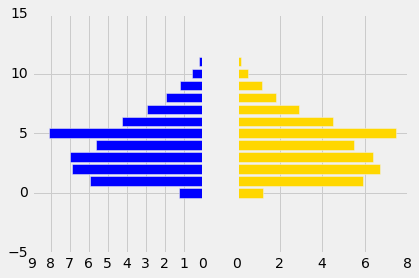

MARYLAND 1860


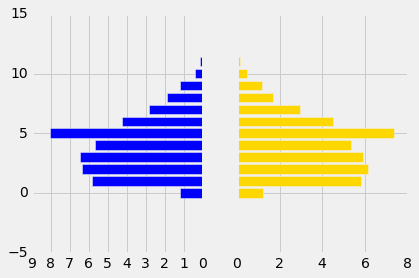

PENNSYLVANIA 1850
PENNSYLVANIA 1860
DELAWARE 1850


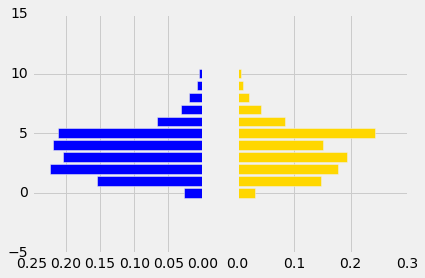

DELAWARE 1860


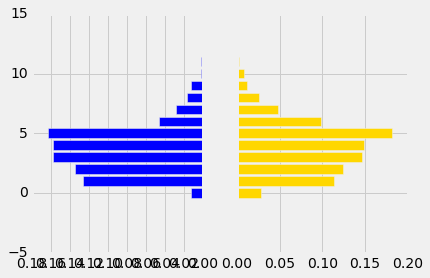

VIRGINIA 1850


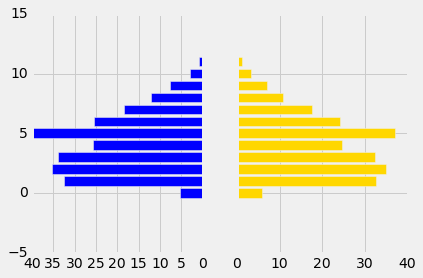

VIRGINIA 1860


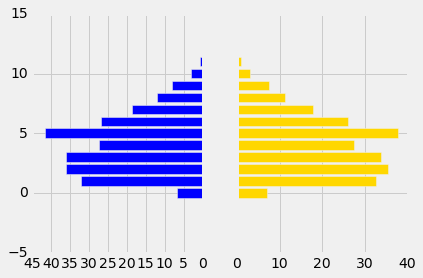

CONNECTICUT 1850
CONNECTICUT 1860
ALABAMA 1850


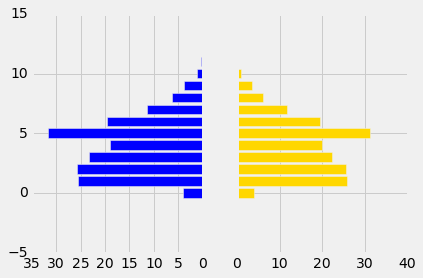

ALABAMA 1860


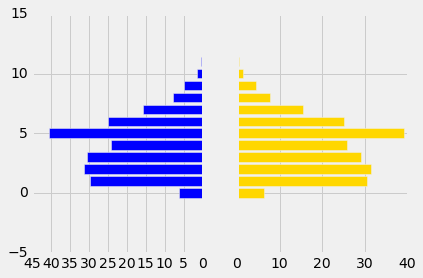

LOUISIANA 1850


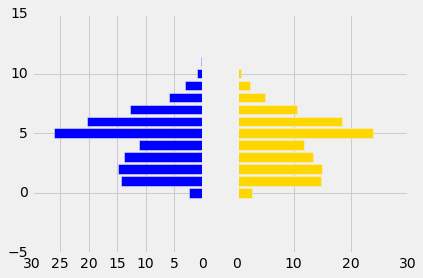

LOUISIANA 1860


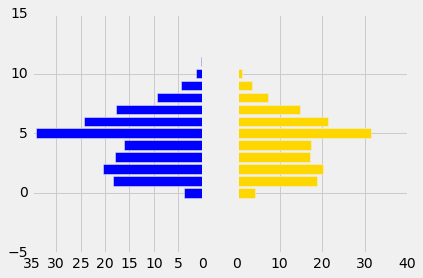

KENTUCKY 1850


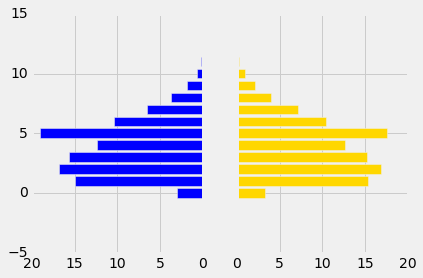

KENTUCKY 1860


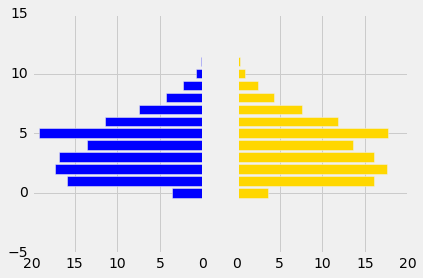

NEW YORK 1850
NEW YORK 1860
WISCONSIN 1850
WISCONSIN 1860
FLORIDA 1850


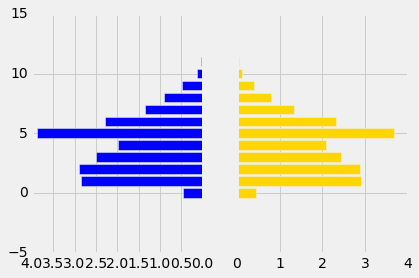

FLORIDA 1860


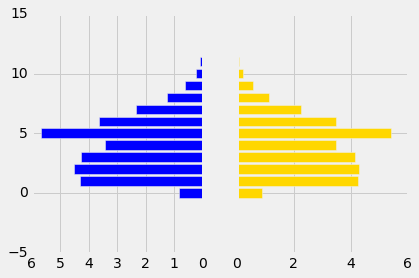

OHIO 1850
OHIO 1860
VERMONT 1850
VERMONT 1860
MISSOURI 1850


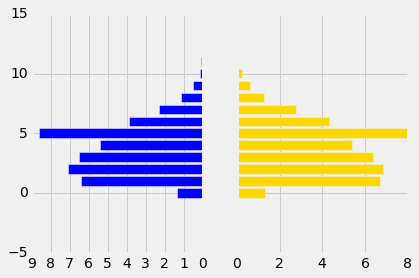

MISSOURI 1860


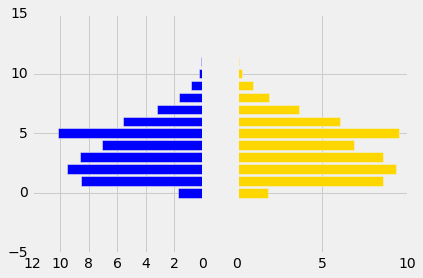

NORTH CAROLINA 1850


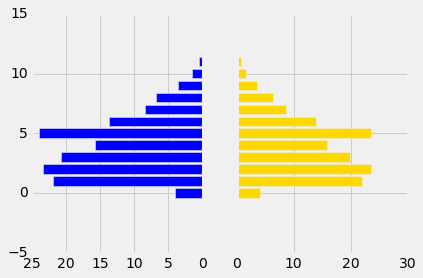

NORTH CAROLINA 1860


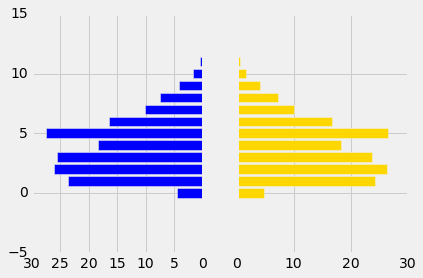

NEW HAMPSHIRE 1850
NEW HAMPSHIRE 1860
SOUTH CAROLINA 1850


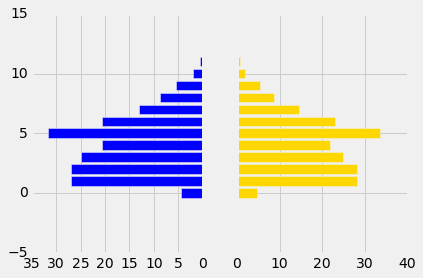

SOUTH CAROLINA 1860


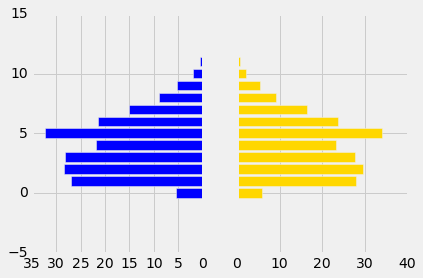

ARKANSAS 1850


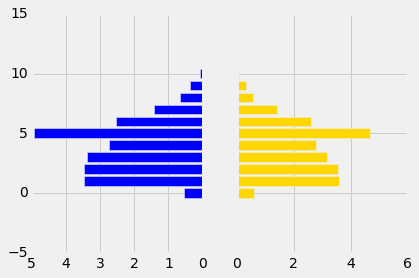

ARKANSAS 1860


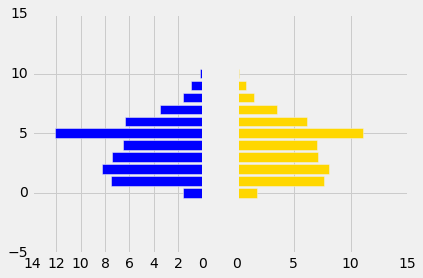

NEW JERSEY 1850


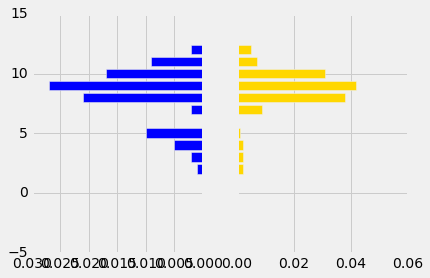

NEW JERSEY 1860


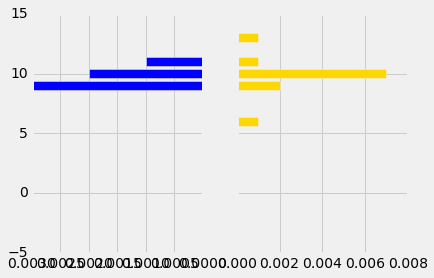

INDIANA 1850
INDIANA 1860
IOWA 1850
IOWA 1860
GEORGIA 1850


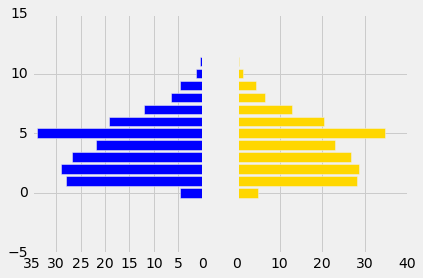

GEORGIA 1860


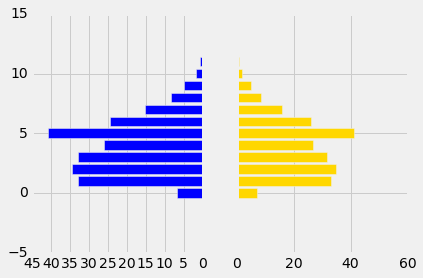

RHODE ISLAND 1850
RHODE ISLAND 1860
ILLINOIS 1850
ILLINOIS 1860
MAINE 1850
MAINE 1860
MINNESOTA 1850
MINNESOTA 1860
MASSACHUSETTS 1850
MASSACHUSETTS 1860
MISSISSIPPI 1850


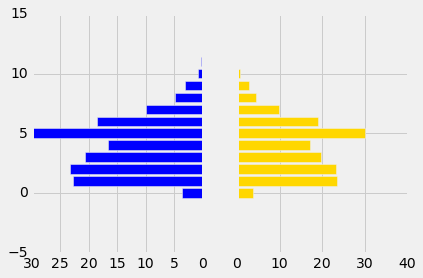

MISSISSIPPI 1860


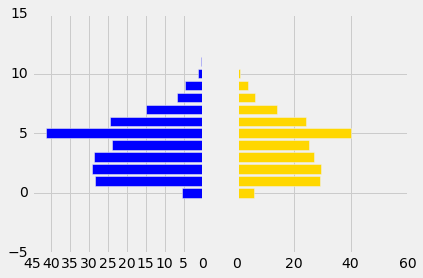

TEXAS 1850


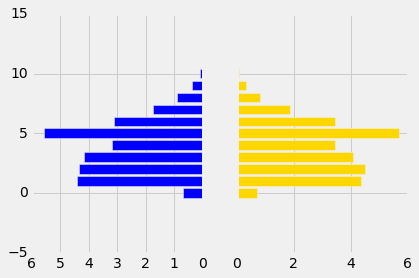

TEXAS 1860


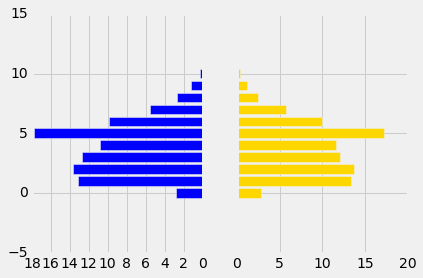

TENNESSEE 1850


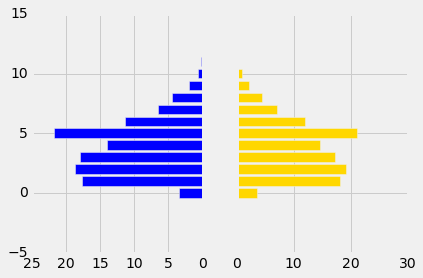

TENNESSEE 1860


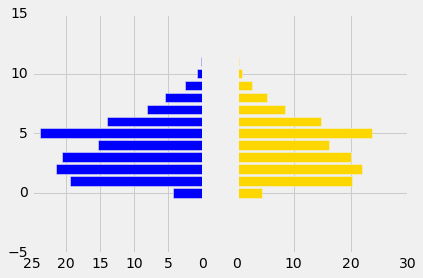

In [20]:
# Population Pyramids
# Sort the data so that we can grab each state and easily separate
# male and female ordered by age. Note that sorting by the variable named 'variable'
# fortuitously sorts by age within a single state.
def popPyr(popM,popF) :
    ## draw a simple population pyramid showing pop in THOUSANDS
    ## Don't sweat the details on this function just know that it expects two
    ## arrays (not tables) of populations sorted by age category and draws therefrom
    ## a population pyramid
    y=np.arange(14)
    fig, axes = plots.subplots(ncols=2, sharey=True)
    plots.locator_params(axis='both',nbins=4)
    axes[0].barh(y,popM/1000,align='center',color='blue')
    axes[1].barh(y,popF/1000,align='center',color='gold')
    axes[0].invert_xaxis()
    plots.locator_params(axis='both',nbins=4)
    plots.show()
    

sorted85=slaves1850.sort('variable').sort('STATE.NAME')
sorted86=slaves1860.sort('variable').sort('STATE.NAME')
stateNames=set(sorted85['STATE.NAME'])
for st in stateNames :
    ## use st with where() to select each state one at a time and plot it
    st85=sorted85.where('STATE.NAME',st)
    st86=sorted86.where('STATE.NAME',st)
    ## this is fragile but we're relying on the repeating structure of the data
    ## the first 13 rows are female; skip the 14 then then next 13 rows are males
    popF85=st85.column('value')[0:14]
    popF86=st86.column('value')[0:14]
    popM85=st85.column('value')[15:29]
    popM86=st86.column('value')[15:29]
    
 
    ## First plot 1850 pop pyramid ... then the 1860 pyramid of same state
    print(st+" 1850")
    ## Only attempt to plot if there is no missing data
    if np.isfinite(sum(popM85)) :
        popPyr(popM85,popF85)
    print(st+" 1860")
    if np.isfinite(sum(popM86)) :
        popPyr(popM86,popF86)
    


## Let's take a closer look a how this data set works

We a cut a few corners in constructing those population pyramids.  In order to use these data in more
sophisticated ways, we are going to have to do some sanity checking and some cleaning up. 
 
Step 0  is to relabel the variable called 'variable' and the variable called 'value'  


In [21]:
# 'variable' and 'value' are not informative variable names. We can do better
slaves1850.relabel('variable','agesex')
slaves1850.relabel('value','N')
slaves1860.relabel('variable','agesex')
slaves1860.relabel('value','N')

DATA.TYPE,YEAR,ICPR.STATE.CODE,STATE.NAME,agesex,N
S,860,1,CONNECTICUT,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,2,MAINE,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,3,MASSACHUSETTS,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,4,NEW HAMPSHIRE,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,5,RHODE ISLAND,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,6,VERMONT,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,11,DELAWARE,X860SLAVE.FEMALES.00.01.UNDER.1.,28
S,860,12,NEW JERSEY,X860SLAVE.FEMALES.00.01.UNDER.1.,0
S,860,13,NEW YORK,X860SLAVE.FEMALES.00.01.UNDER.1.,nan
S,860,14,PENNSYLVANIA,X860SLAVE.FEMALES.00.01.UNDER.1.,nan


### What's up with 'nan' ?  

Why do you think New York's "X860SLAVE.FEMALES.00.01.UNDER.1." are reported as 'nan'  while those of New Jersey
are reported as 0 ?

Yes google knows the answer, but thinking before googling is good for your soul.

In [22]:

## Let's lose the virtuous -- but non interesting states that have no saves

slaves1850=slaves1850.where(slaves1850['N'] >=0)
slaves1860=slaves1860.where(slaves1860['N'] >=0)



### Sanity check:  Do the data have the same structure for each state and do the 1850 and 1860 data have the same formats?


In [23]:
# As a sanity check,  let's verify:
## that each state in our dataset has a non-nan entry for each age group -- ie let's verify
## that the set of recrods for each state.name is the same size


s50test=slaves1850.select(['STATE.NAME','N']).where(slaves1850['N'] >=0).group('STATE.NAME', collect= len)
s60test=slaves1860.select(['STATE.NAME','N']).where(slaves1860['N'] >=0).group('STATE.NAME', collect= len)

s50test.sort('STATE.NAME').show()
s60test.sort('STATE.NAME').show()

## Should s60test ans s50test have the same number of rows?
## what are the implications of different number of rows?

print("Hmmmm the 1850 table has ",s50test.num_rows, "rows")
print()
print("And the 1860 table has", s60test.num_rows, "rows")
print()
print("WHAT COULD THIS MEAN?")


STATE.NAME,N len
ALABAMA,32
ARKANSAS,32
DELAWARE,32
FLORIDA,32
GEORGIA,32
KENTUCKY,32
LOUISIANA,32
MARYLAND,32
MISSISSIPPI,32
MISSOURI,32


STATE.NAME,N len
ALABAMA,32
ARKANSAS,32
DELAWARE,32
FLORIDA,32
GEORGIA,32
KANSAS,32
KENTUCKY,32
LOUISIANA,32
MARYLAND,32
MISSISSIPPI,32


Hmmmm the 1850 table has  16 rows

And the 1860 table has 18 rows

WHAT COULD THIS MEAN?


## What ? more slave states in 1860 than in 1850 ? 
That's kind of surprising isn't it?  Let's compare the set of slave states in 1850 with that of 1860
It turns out that python has a pretty convienient tool for doing this

In [24]:
## In python a 'set' contain objects whose memebership status can be compared with other sets
##  setA & setB  gives the intersection of setA and setB
## setA - setB gives the disjunction (the stuff in setA that is not in setB)
## Note that set is a python concept NOT a datascience.Table thing.

ss50=set(s50test.column('STATE.NAME'))
ss60=set(s60test.column('STATE.NAME'))

print("Here are the states that have slaves in 1850 AND a860")
print(ss50 & ss60)
print()
print("Here are the states that have slaves in 1850 but NOT in 1860")
print(ss50 - ss60)
print("Here are the states that have slaves in 1860 BUT did NOT in 1850")
print(ss60 - ss50)


Here are the states that have slaves in 1850 AND a860
{'MISSOURI', 'NORTH CAROLINA', 'ALABAMA', 'SOUTH CAROLINA', 'ARKANSAS', 'NEW JERSEY', 'LOUISIANA', 'KENTUCKY', 'DELAWARE', 'GEORGIA', 'FLORIDA', 'MARYLAND', 'MISSISSIPPI', 'TEXAS', 'VIRGINIA', 'TENNESSEE'}

Here are the states that have slaves in 1850 but NOT in 1860
set()
Here are the states that have slaves in 1860 BUT did NOT in 1850
{'NEBRASKA', 'KANSAS'}


###  This would be a good time to Google The Missouri Compromise; The Compromise of 1850; The Kansas-Nebraska Act; and The Dred Scott Decision.

Now let's clean up the original data tables (slaves1850 and slaves1860) so that we can estimate slave mortality/survival rates... and eventually a bunch of other stuff.

The steps we'll take to accomplish this are:
<ol>
<li> Clean up the agesex variable. Annoyingly, they are not coded consistently in 1850 and 1860
<li> Create columns of numbers that reflect the age categories embedded in the agesex variable
</ol>
For this we will need to use some string functions:
<ul>
<li> x.split('.') -- which converts a sring, x, into a list by splitting at each instance of '.'
<li> x.find('boo') -- which reports the index of the 'b' within the string x.
<li> 'y' in L  -- which reports whether or not the  'y' is an element of list L
</ul>

In [25]:
## It turns out that the agesex variable is not easily comparable across 1850 and 1860. This sort of thing is 
## quite common in science -- but it *really* sucks.
slaves1850.where(slaves1850['STATE.NAME'] == "VIRGINIA").select('agesex').show()
slaves1860.where(slaves1860['STATE.NAME'] == "VIRGINIA").select('agesex').show()


agesex
X850SLAVE.FEMALES.00.01.UNDER.01.
X850SLAVE.FEMALES.01.04
X850SLAVE.FEMALES.05.09
X850SLAVE.FEMALES.10.14
X850SLAVE.FEMALES.15.19
X850SLAVE.FEMALES.20.29
X850SLAVE.FEMALES.30.39
X850SLAVE.FEMALES.40.49
X850SLAVE.FEMALES.50.59
X850SLAVE.FEMALES.60.69


agesex
X860SLAVE.FEMALES.00.01.UNDER.1.
X860SLAVE.FEMALES.01.04
X860SLAVE.FEMALES.05.09
X860SLAVE.FEMALES.10.14
X860SLAVE.FEMALES.15.19
X860SLAVE.FEMALES.20.29
X860SLAVE.FEMALES.30.39
X860SLAVE.FEMALES.40.49
X860SLAVE.FEMALES.50.59
X860SLAVE.FEMALES.60.69


## Now some cleanup -- break up the 'agesex' column  into one containing age and one containing sex

In [26]:
## The next step is to clean up the 'agesex' variable so that we can: (1) delete the TOTAL and UNKNOWN AGE rows
## and (2) create separate columns that identify the age categories and the sex.

## There are some annoying differences and irregularities in the agesex column. We'll fix it by writing a function
## that we'll call "improve" which we will use with .apply() and .append_column()  -- this is 
## a construction that we'll probably use a lot this semester
def improve (x) :
    ## a function that rationalizes the agesex column in the ICPSR slaves data
    ## it is designed to be used with .apply()
    res=x.replace('.AGE.UKWN','UNKNOWN')\
    .replace('.AGE.UNKW','UNKNOWN')\
    .replace('X850SLAVE.','')\
    .replace('X860SLAVE.','') \
    .replace('X850TOTAL.SLAVE.','TOTAL')\
    .replace('X860TOT.SLAVE.','TOTAL')\
    .replace('.UNDER.1.','')\
    .replace('.UNDER.01.','')\
    .replace('AND.OVER','110')
    return(res)

## test the imporve function on one state's worth of data
virginia=slaves1850.where(slaves1850['STATE.NAME'] == "VIRGINIA")   

Table().with_columns(['new',virginia.apply(improve,['agesex']),
                     'old',virginia.column('agesex')]).show(5)

## OK lets do it for slaves18X0
slaves1850.append_column('agesex',slaves1850.apply(improve,['agesex']))
slaves1860.append_column('agesex',slaves1860.apply(improve,['agesex']))
slaves1860.show(10)

## Now pull out the total and unknown rows
totals1850= slaves1850.where([ 'TOTAL' in f for f in slaves1850.column('agesex') ])
unknows1850=slaves1850.where(['UNKNOWN' in f for f in slaves1850.column('agesex') ])
totals1860= slaves1860.where([ 'TOTAL' in f for f in slaves1860.column('agesex') ])
unknows1860=slaves1860.where(['UNKNOWN' in f for f in slaves1860.column('agesex') ])
print("TOTAL rows 1850:",totals1850.num_rows," 1860:", totals1860.num_rows)
print("UNKNOWN rows 1850: ", unknows1850.num_rows," 1860:", unknows1860.num_rows)
## remove TOTAL and UNKNOWN rows from slaves18X0 tables
slaves1850=slaves1850.where( ['TOTAL' not in f and 'UNKNOWN' not in f for f in slaves1850.column('agesex')])
slaves1860=slaves1860.where( ['TOTAL' not in f and 'UNKNOWN' not in f for f in slaves1860.column('agesex')])
print("rows known age slaves1850 :", slaves1850.num_rows, "1860: ", slaves1860.num_rows)
## Heads up.  slaves18x0 tables change in this cel.  Do not run again without executing all cells above


new,old
FEMALES.00.01,X850SLAVE.FEMALES.00.01.UNDER.01.
FEMALES.01.04,X850SLAVE.FEMALES.01.04
FEMALES.05.09,X850SLAVE.FEMALES.05.09
FEMALES.10.14,X850SLAVE.FEMALES.10.14
FEMALES.15.19,X850SLAVE.FEMALES.15.19


DATA.TYPE,YEAR,ICPR.STATE.CODE,STATE.NAME,agesex,N
S,860,11,DELAWARE,FEMALES.00.01,28
S,860,12,NEW JERSEY,FEMALES.00.01,0
S,860,32,KANSAS,FEMALES.00.01,0
S,860,34,MISSOURI,FEMALES.00.01,1805
S,860,35,NEBRASKA,FEMALES.00.01,0
S,860,40,VIRGINIA,FEMALES.00.01,7079
S,860,41,ALABAMA,FEMALES.00.01,6400
S,860,42,ARKANSAS,FEMALES.00.01,1743
S,860,43,FLORIDA,FEMALES.00.01,883
S,860,44,GEORGIA,FEMALES.00.01,7137


TOTAL rows 1850: 32  1860: 36
UNKNOWN rows 1850:  32  1860: 36
rows known age slaves1850 : 448 1860:  504


In [27]:
def parseAge(x) :
    ## this uses split() to separate string into a list
    def intOrNan(z) :
        ## if z is an integer, return itself otherwise 'nan'
        try :
            return (int(z))
        except :
            return (float('nan'))
    
    words=x.split('.')
    # return an python 'dictionary' object
    return({'sex': words[0],'loAge': intOrNan(words[1]), 'hiAge' : intOrNan(words[2])})

parsedSexAge=slaves1850.apply(parseAge,['agesex'])
slaves1850=slaves1850.with_columns([
    'sex',[f['sex'] for f in parsedSexAge],
    'loAge',[f['loAge'] for f in parsedSexAge],
    'hiAge',[f['hiAge'] for f in parsedSexAge]])
slaves1850.show(10)
## now do 1860
parsedSexAge=slaves1860.apply(parseAge,['agesex'])
slaves1860=slaves1860.with_columns([
    'sex',[f['sex'] for f in parsedSexAge],
    'loAge',[f['loAge'] for f in parsedSexAge],
    'hiAge',[f['hiAge'] for f in parsedSexAge]])
#slaves1860.show(10)

DATA.TYPE,YEAR,ICPR.STATE.CODE,STATE.NAME,agesex,N,sex,loAge,hiAge
S,850,11,DELAWARE,FEMALES.00.01,32,FEMALES,0,1
S,850,12,NEW JERSEY,FEMALES.00.01,0,FEMALES,0,1
S,850,34,MISSOURI,FEMALES.00.01,1334,FEMALES,0,1
S,850,40,VIRGINIA,FEMALES.00.01,5814,FEMALES,0,1
S,850,41,ALABAMA,FEMALES.00.01,4118,FEMALES,0,1
S,850,42,ARKANSAS,FEMALES.00.01,619,FEMALES,0,1
S,850,43,FLORIDA,FEMALES.00.01,451,FEMALES,0,1
S,850,44,GEORGIA,FEMALES.00.01,4889,FEMALES,0,1
S,850,45,LOUISIANA,FEMALES.00.01,2591,FEMALES,0,1
S,850,46,MISSISSIPPI,FEMALES.00.01,3788,FEMALES,0,1


### Let's use our newer better agesex variable to do a little sanity checking

Both censuses provide age/sex breakdowns as well as population totals of slaves. 
Let's add up the former and see if it matches the latter.

In [28]:
# The sum of slaves of known ages and slaves of unknown ages ought to equal the 
# reported total number of slaves... right?
print("This should be zero for 1850")
print(sum(slaves1850['N']) + sum(unknows1850['N'])-sum(totals1850['N']))
print("yeah")
print()
print("This should be zero for 1860")
print(sum(slaves1860['N']) + sum(unknows1860['N'])-sum(totals1860['N']))
print("uh oh..")
      

This should be zero for 1850
0.0
yeah

This should be zero for 1860
-25389.0
uh oh..


## Looks like something is amiss in the 1860 Census

On the positive side, the 1850 census passes the sanity test, but we'll need to 
take a closer look at the 1860 data.  Let's see if bots sexes are equally afflicted

In [29]:
## Ouch let's see if its both sexes in 1860
for sex in ['MALES','FEMALES'] :
    print(sex+ ' known and unknown ages - census bureau total shoud be 0')
    print(sum(slaves1860.where('sex',sex)['N']) + sum(unknows1860.where('agesex',sex+'UNKNOWN')['N'])\
         -sum(totals1860.where('agesex','TOTAL'+sex)['N']))
    
    

MALES known and unknown ages - census bureau total shoud be 0
-13361.0
FEMALES known and unknown ages - census bureau total shoud be 0
-12028.0


## We'd better do the sanity check state by state on the 1860 Census 



In [30]:
## state level sanity check for 1860 census

# Since we're going to do this for each sex -- withing each state, lets write a function

def checkTots(slaves,unknown,total,SEX) :
    # expects a set of 3 tables generated above slaves of known age, unknown age, and the totals
    # returns a table showing the total of known+unknown and the census bureau's total which SHOULD
    # be the same!
    f60_knownAge=slaves.where('sex',SEX).group('STATE.NAME',sum).select(['STATE.NAME','N sum'])
    ## we'll need to add back in the unknown so lets make a .join()-worthy table of unknown aged slaves
    f60_uknownAge=unknown.where('agesex',SEX+'UNKNOWN').select(['STATE.NAME','N']).relabel('N','N unk')
    ## add them together and combine into one table
    f60_itemized=f60_knownAge.join('STATE.NAME',f60_uknownAge)
    f60_itemized.append_column('N itemized',f60_itemized.apply(lambda k,u,:(k+u),['N sum','N unk']))
    ## add a column of what the census bureau said were totals
    f60_totals=total.where('agesex','TOTAL'+SEX).select(['STATE.NAME','N']).relabel('N','N tot')
    f60_itemized=f60_itemized.join('STATE.NAME',f60_totals)
    ## and take the differences of the last two columns
    f60_itemized.append_column('DIFF',f60_itemized.apply(lambda tot,it :(tot-it),['N tot','N itemized']))
    return(f60_itemized)
    

checkTots(slaves1860,unknows1860,totals1860,'FEMALES').show()
checkTots(slaves1860,unknows1860,totals1860,'MALES').show()


## Now the same trick for Males

STATE.NAME,N sum,N unk,N itemized,N tot,DIFF
ALABAMA,217308,6,217314,217314,0
ARKANSAS,54933,8,54941,54941,0
DELAWARE,938,0,938,938,0
FLORIDA,30256,41,30297,30397,100
GEORGIA,232945,60,233005,233005,0
KANSAS,2,0,2,2,0
KENTUCKY,112445,29,112474,112474,0
LOUISIANA,157622,8,157630,159749,2119
MARYLAND,42876,0,42876,42876,0
MISSISSIPPI,207929,84,208013,217330,9317


STATE.NAME,N sum,N unk,N itemized,N tot,DIFF
ALABAMA,217764,2,217766,217766,0
ARKANSAS,56172,2,56174,56174,0
DELAWARE,860,0,860,860,0
FLORIDA,31221,27,31248,31348,100
GEORGIA,229125,68,229193,229193,0
KANSAS,0,0,0,0,0
KENTUCKY,112979,30,113009,113009,0
LOUISIANA,169084,12,169096,171977,2881
MARYLAND,44313,0,44313,44313,0
MISSISSIPPI,209297,80,209377,219301,9924


## Mississippi ?  really?

So there are clearly problems with <i> some </i> states.  Mississippi stands out as particularly
lame at arithmetic, but what do we make of the other oddities?  Can we still use these data ?


## OK let's get over it and move on.

We are now in a position to calculate some interesting quantities and draw some pretty graphs

In [31]:


print("slaves of known age 1850 ")
sum_1850=sum(slaves1850['N'])

print(sum_1850)
print("slaves of known age 1860 ")
sum_1860=sum(slaves1860['N'])
print(sum_1860)
print("percent increase 1850 - 1860")
print((sum_1860 -sum_1850)/sum_1850)
print("average annual growth rate")
import math
growthrate = math.log(sum_1860/sum_1850) / 10
print (growthrate)
print("doubling time in years")
dtime = math.log(2)/growthrate
print (dtime)



slaves of known age 1850 
3196908.0
slaves of known age 1860 
3924460.0
percent increase 1850 - 1860
0.227579899077
average annual growth rate
0.020504466946637163
doubling time in years
33.804691551546284


## Is that a fast growth rate or a slow growth rate?

Let's look at population growth by age category

sex,loAge,hiAge,agesex,DATA.TYPE sum,YEAR sum,ICPR.STATE.CODE sum,STATE.NAME sum,N1860
FEMALES,0,1,FEMALES.00.01,,15480,726,,58360
FEMALES,1,4,FEMALES.01.04,,15480,726,,272489
FEMALES,5,9,FEMALES.05.09,,15480,726,,288449
FEMALES,10,14,FEMALES.10.14,,15480,726,,264002
FEMALES,15,19,FEMALES.15.19,,15480,726,,228178


agesex,sex,loAge,hiAge,N1850,N1860
FEMALES.00.01,FEMALES,0,1,41225,58360
FEMALES.01.04,FEMALES,1,4,231953,272489
FEMALES.05.09,FEMALES,5,9,239637,288449
FEMALES.10.14,FEMALES,10,14,214368,264002
FEMALES.15.19,FEMALES,15,19,180792,228178


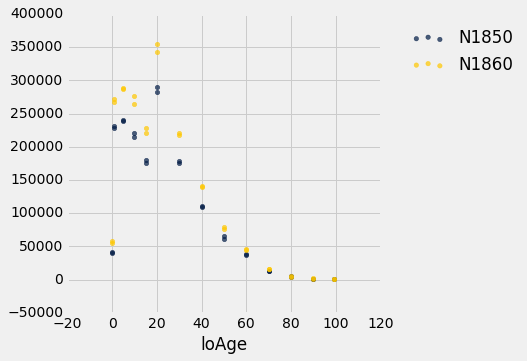

In [32]:
## join the 1850 and 1860 data together in one table to facilitate graphing

spop1850=slaves1850.groups(['sex','loAge','hiAge','agesex'], sum).relabeled('N sum','N1850')
spop1860=slaves1860.groups(['sex','loAge','hiAge','agesex'], sum).relabeled('N sum','N1860')
spop1860.show(5)

spopByYear=spop1850.select(['agesex','sex','loAge','hiAge','N1850']).join('agesex',spop1860.select(['agesex','N1860']))
spopByYear.show(5)

spopByYear.scatter('loAge',select=['N1850','N1860'])


In [ ]:
#plt.plot(spopByYear.where('sex','FEMALES')['loAge'],spopByYear.where('sex','FEMALES')['N1860'],'bs')
#plt.plot(spopByYear.where('sex','MALES')['loAge'],-spopByYear.where('sex','MALES')['N1860'],'r--')

#plt.axis([0,110,-500000,500000])

In [ ]:
'N' in slaves1850.labels


## Interesting scatter plot don't you think?

How many gold dots and how many blue dots are there for each age category? Is that right?

What is going on with age 20 (loAge = 20) why does it jump ?





# So, you <i>might</i> remember that our goal in all this is to find a set
of survival probabilities by age for US resident slaves between 1850 and 1860.

In order to do this, with the data at hand, we are going to have to make some
assumptions.  But let's start with a description of the process that I have in mind
and then decide what sort assumption we'll need to make and discuss whether or not
we can live with them

Let's divide the number of US resident enslaved people of each sex who were of age $X$ in 1860
by the number of US resident enslaved people of the same sex but of age $X-10$ in 1850

If we let $N_{x,t}$ be the number of US resident slaves of age $x$ in year $t$ then the quantity I am proposing
to consider is:

$S_{x}=\frac{N_{x,1860}}{N_{x-10,1850}}$

## QUESTION:  What assumptions do we need to make in order to assert that $S_{x}$ is the 'true' survival probability ?




How to calculate $S_x$:


In [ ]:
## OK Let's proceed.  Because we are going to want to do this a couple of times...
## let's create a function that takes as inputs tables of counts of slaves by age in 1850 and 1860
## and returns a table that contains all the input information + a column the survival rate discussed above


def getSurv (spop1850,spop1860) :
    ## expects two tables one of slave counts by age in 1850 and the other in 1860
    ## returns one table with all the input tables joined + a column of survival rates by age
    ## NOTE spop18X0 is NOT slaves18X0 spop18x0 must have only ONE row for each age group
    def combineYears(spop5,spop6) :
        ## combine spop1850 and spop1860 into one table with N1850 and N1860 columns
        for lab in ['N', 'N sum'] :
            if lab in spop5.labels :
                spop5.relabel(lab,'N1850')
            if lab in spop6.labels :
                spop6.relabel(lab,'N1860')
        spop2years=spop5.select(['agesex','sex','loAge','hiAge','N1850']).join('agesex',spop6.select(['agesex','N1860']))
        return(spop2years)
                                                                                                                                                             
        
    def combineAges(spop):
        ## given a table of counts of slaves by age ... returns same table with additional rows
        ## created by adding together ages 0 and 1..4   AND ages 10-14 with 15-19
        ## the resulting table will have OVERLAPPING AGES       
        
        # extract age 0 and 1-4 for each state and sum the Ns
        temp=spop.where(spop.column('loAge')<= 1).groups(['sex'],sum)
        # extract 10-14 and 15-19 for each state and sum the Ns
        temp2=spop.where(spop.column('loAge'), are.between_or_equal_to(10,15)).groups(['sex'],sum)
        ## correct the loAge and hiAge  which were also summed in the previous operation
        temp.append_column('loAge sum',0)
        temp.append_column('hiAge sum',4)
        temp2.append_column('loAge sum',10)
        temp2.append_column('hiAge sum',19)
        ## combine temp and temp2
        temp=temp.with_rows(temp2.to_array())
        ## change columnnames of temp
        temp.relabel('loAge sum','loAge')
        temp.relabel('hiAge sum','hiAge')
        temp.relabel('N1850 sum','N1850')
        temp.relabel('N1860 sum', 'N1860')
        temp.append_column('agesex sum',['FEMALES.0.4','MALES.0.4','FEMALES.10.19','MALES.10.19'])
        temp.relabel('agesex sum','agesex')
       
        ## add rows in temp to original table spop
        res=spop.where(spop.column('loAge') >1).with_rows( \
        temp.select(['agesex','sex','loAge','hiAge','N1850','N1860']).to_array())
        return(res)
    
    def addMidageCols(spop) :
        ## midage and midage10 columns to table where midage is midpoint between loAge and hiAge
        ## and midage10 is midage+10.
        ## these will be used in clever join command later
        spop.append_column('midAge',spop.apply(lambda hi, lo :(lo+hi)/2, ['loAge','hiAge']))
        spop.append_column('midAge10',spop.apply(lambda mid : (mid+10), ['midAge']))
        return(spop)
    
    ## use the functions defined above and calculate the survival rate
    spop=combineYears(spop1850,spop1860)
    spop=combineAges(spop)
    spop=addMidageCols(spop)
    #  separate males and females b/c joins only work on a single variable
    males=spop.where(spop['sex'] == 'MALES')
    females=spop.where(spop['sex'] == 'FEMALES')
    #  join with self (very clever) matching midAge and midAge10 !
    males=males.join('midAge10',males,'midAge')
    females=females.join('midAge10',females,'midAge')
    # and the suvival rate calculation
    males.append_column('surv5060',males.apply(lambda n1850,n1860:(n1860/n1850), ['N1850','N1860_2']))
    females.append_column('surv5060',females.apply(lambda n1850,n1860:(n1860/n1850), ['N1850','N1860_2']))

    res=females.append(males)

    return(res.sort('midAge').sort('sex'))

#################################################################
## Now let's test  the function  and draw a scatter
################################################################
s50=slaves1850.groups(['loAge','hiAge','sex','agesex'], sum)
s60=slaves1860.groups(['loAge','hiAge','sex','agesex'], sum)

slaveSurv=getSurv(s50,s60)
slaveSurv.to_csv("SlaveSurvivalRates1850_60.csv")
slaveSurv.drop(['agesex_2','sex_2']).show()
fSurv=slaveSurv.where(slaveSurv.column('sex') == 'FEMALES')
mSurv=slaveSurv.where(slaveSurv.column('sex') == 'MALES')
## plot male and female survival rates against midAge
fSurv.select(['midAge','surv5060']).join('midAge',mSurv.select(['midAge','surv5060'])).relabel('surv5060','FemSurv').\
relabel('surv5060_2','MalSurv').scatter('midAge',select=['FemSurv','MalSurv'])
    

# So there...  We now have before us some estimates of the 10 year survival probabilities of US resident slaves in 1850. 

## But are they any good?

In a perfect world<sup id="a1">[1](#f1)</sup> , we would know the exact dates of birht and death of everyone in the population.  We of course have nothing like that. What we have are two observations made 10 years apart.  At each point in time the population of living slaves was assigned to age categories by either their owners or the census enumerator (generally the county sheriff).   This is quite different from the perfect set up.  

Let's consider some of the implications:

<ol>
<li> What do we make of the rising survival probability at the oldest age group?
<li> What do we make of the probability of survival from 0-4 to 10-14 for male slaves ... can it really be greater than 1 ?
</ol>

## For next week...

<ol>
<li> review the code in the notebook to make sure that you understand:
<ul>
<li> What we have done to produce these survival probabilities
<li> What these survival probabilities really are
</ul>
<li> Develop a cocktail party level understanding of infant and child mortality patterns today and in the 19th Century. so that we can start next week with a discussion of how we might improve these survival probability estimates.  To that end:
<ol>
<li> Read Postell (1952) which includes a calculation of both fertility and infant mortality rates based on a different kind of set from what we have.  Read this paper critically. For our purpose, this is both a secondary and a primary source.  We are interested both in 1850 <b>and</b> 1950.
<li> Visit this UNICEF site, http://data.unicef.org/child-mortality/under-five.html and look at the data that they provide on infant and child mortality in various regions currently and back to the middle of the 20th Century.
</ol>
</ol>


In [ ]:


### OBSOLETE   now embedded in function above

### OK Let's proceed. In order to calculate the survival rates defined above, we are going
## to have to combine a few age categories so that we will be able to compare them with their
## corresponding quantities 10 years later. 

# For example,  we have age 0 and 1-4  ... and then we have age 10-14  If we have age 10  and 11-14 all would be great
# but we do not so we'll have to combine 1 and 1-4.  A process which turns out to be kind of tedious with our 
# current tool set.

# extract age 0 and 1-4 for each state and sum the Ns
temp=spopByYear.where(spopByYear.column('loAge')<= 1).groups(['sex'],sum)
# extract 10-14 and 15-19 for each state and sum the Ns
temp2=spopByYear.where(spopByYear.column('loAge'), are.between_or_equal_to(10,15)).groups(['sex'],sum)

temp.show()
temp2.show()
## correct the loAge and hiAge  which were also summed in the previous operation
temp.append_column('loAge sum',0)
temp.append_column('hiAge sum',4)
temp2.append_column('loAge sum',10)
temp2.append_column('hiAge sum',19)
## combine temp and temp2
temp=temp.with_rows(temp2.to_array())
## change columnnames of temp
temp.relabel('loAge sum','loAge')
temp.relabel('hiAge sum','hiAge')
temp.relabel('N1850 sum','N1850')
temp.relabel('N1860 sum', 'N1860')
temp.append_column('agesex sum',['FEMALES.0.4','MALES.0.4','FEMALES.10.19','MALES.10.19'])
temp.relabel('agesex sum','agesex')
temp.show()
spopByYearx=spopByYear.where(spopByYear.column('loAge') >1).with_rows(
    temp.select(['agesex','sex','loAge','hiAge','N1850','N1860']).to_array())


spopByYearx.append_column('midAge',spopByYearx.apply(lambda hi, lo :(lo+hi)/2, ['loAge','hiAge']))

spopByYearx.sort('loAge')
print('NOTICE that our age categories are NO LONGER NON-OVERLAPPING')

In [ ]:
## now the magic part: getting mortality rates out of spopByYearx
## first trick add a mid point of the age range
spopByYearx.append_column('midAge',spopByYearx.apply(lambda hi,lo : (hi+lo)/2, ['hiAge','loAge']))
## and add another variable that is 10 more than the midpoint of the age range
spopByYearx.append_column('midAge10',spopByYearx.apply(lambda mid : (mid+10), ['midAge']))
spopByYearx.show(5)

males5060=spopByYearx.where(spopByYearx['sex'] == 'MALES')
females5060=spopByYearx.where(spopByYearx['sex'] == 'FEMALES')

males5060=males5060.join('midAge10',males5060,'midAge' )
females5060=females5060.join('midAge10',females5060,'midAge' )

## and here is where we get the survival rates
males5060.append_column('surv5060',males5060.apply(lambda n1850, n1860 : (n1860/n1850) , ['N1850','N1860_2']))
print("Male survival rates for slaves in the US 1850-60")
males5060.select(['agesex','agesex_2','N1850','N1860','N1860','N1860_2','surv5060']).show()

females5060.append_column('surv5060',females5060.apply(lambda n1850, n1860 : (n1860/n1850) , ['N1850','N1860_2']))
print("Female survival rates for slaves in the US 1850-60")

females5060.select(['agesex','agesex_2','N1850','N1860','N1860','N1860_2','surv5060']).show()
      
  

<img src="http://images.slideplayer.com/13/3828559/slides/slide_4.jpg">


https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=0ahUKEwij5unfl7rNAhVT2GMKHYGKAaEQjRwIBw&url=http%3A%2F%2Fslideplayer.com%2Fslide%2F3828559%2F&psig=AFQjCNHZaJXmI6Ww060hSrcu3wo6L9D9kw&ust=1466635127084012